In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../')
from Util import loadBeerRaw,loadWine
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import axes3d, Axes3D

X_train, X_test, y_train, y_test= loadBeerRaw()
ica = FastICA(n_components=2,
         random_state=0)
encoder = LabelEncoder()
X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)
icaComponents =ica.fit_transform(X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']])
icaDf = pd.DataFrame(data = icaComponents
             , columns = ['ICA component 1', 'ICA component 2'])
scores =[]
for k in range(1,20):
    kmeans = KMeans(n_clusters=k, random_state=0)
    scores.append(kmeans.fit(icaComponents).score(icaComponents))    
    if k % 5 == 0:
        print("Training k = "+str(k)+" clusters...")

Training k = 5 clusters...
Training k = 10 clusters...
Training k = 15 clusters...


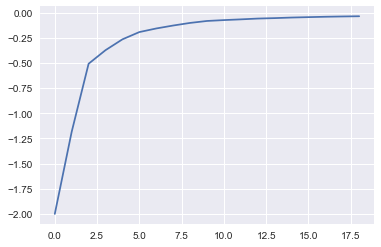

In [6]:
plt.plot(scores, label="score")

In [7]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(icaDf)
y_kmeans = kmeans.predict(icaDf)

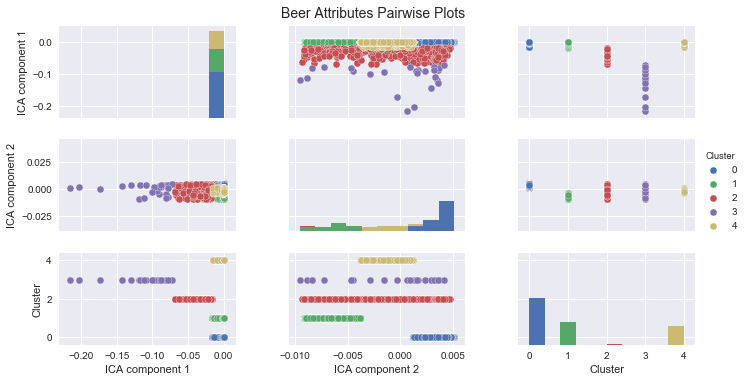

In [8]:
icaDf['Cluster'] =y_kmeans
pp = sns.pairplot(icaDf, hue='Cluster', size=1.8, aspect=1.8)
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Beer Attributes Pairwise Plots', fontsize=14)

Training k = 5 clusters...
Training k = 10 clusters...
Training k = 15 clusters...
Training k = 20 clusters...
Training k = 25 clusters...
Training k = 30 clusters...
Training k = 35 clusters...
Training k = 40 clusters...
Training k = 45 clusters...


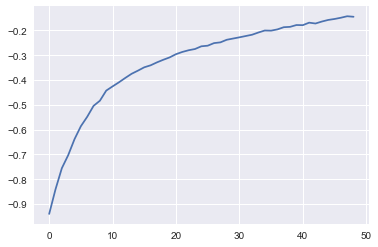

In [19]:
X_train, X_test, y_train, y_test= loadWine()
    
ica = FastICA(n_components=9,
         random_state=0)
cols = []
for x in range(0,9):
    cols.append('ICA component '+str(x))
icaComponents =ica.fit_transform(X_train)
X_train = pd.DataFrame(data = icaComponents,index=X_train.index
             , columns = cols)
icaComponents = ica.transform(X_test)
X_test = pd.DataFrame(data = icaComponents,index=X_test.index
             , columns = cols)
scores =[]
for k in range(1,50):
    kmeans = KMeans(n_clusters=k, random_state=0)
    scores.append(kmeans.fit(icaComponents).score(icaComponents))    
    if k % 5 == 0:
        print("Training k = "+str(k)+" clusters...")
plt.plot(scores, label="score")

In [21]:
icaDf = pd.DataFrame(data = icaComponents
             , columns =cols)
kmeans = KMeans(n_clusters=20, random_state=0)
kmeans.fit(icaDf)
y_kmeans = kmeans.predict(icaDf)

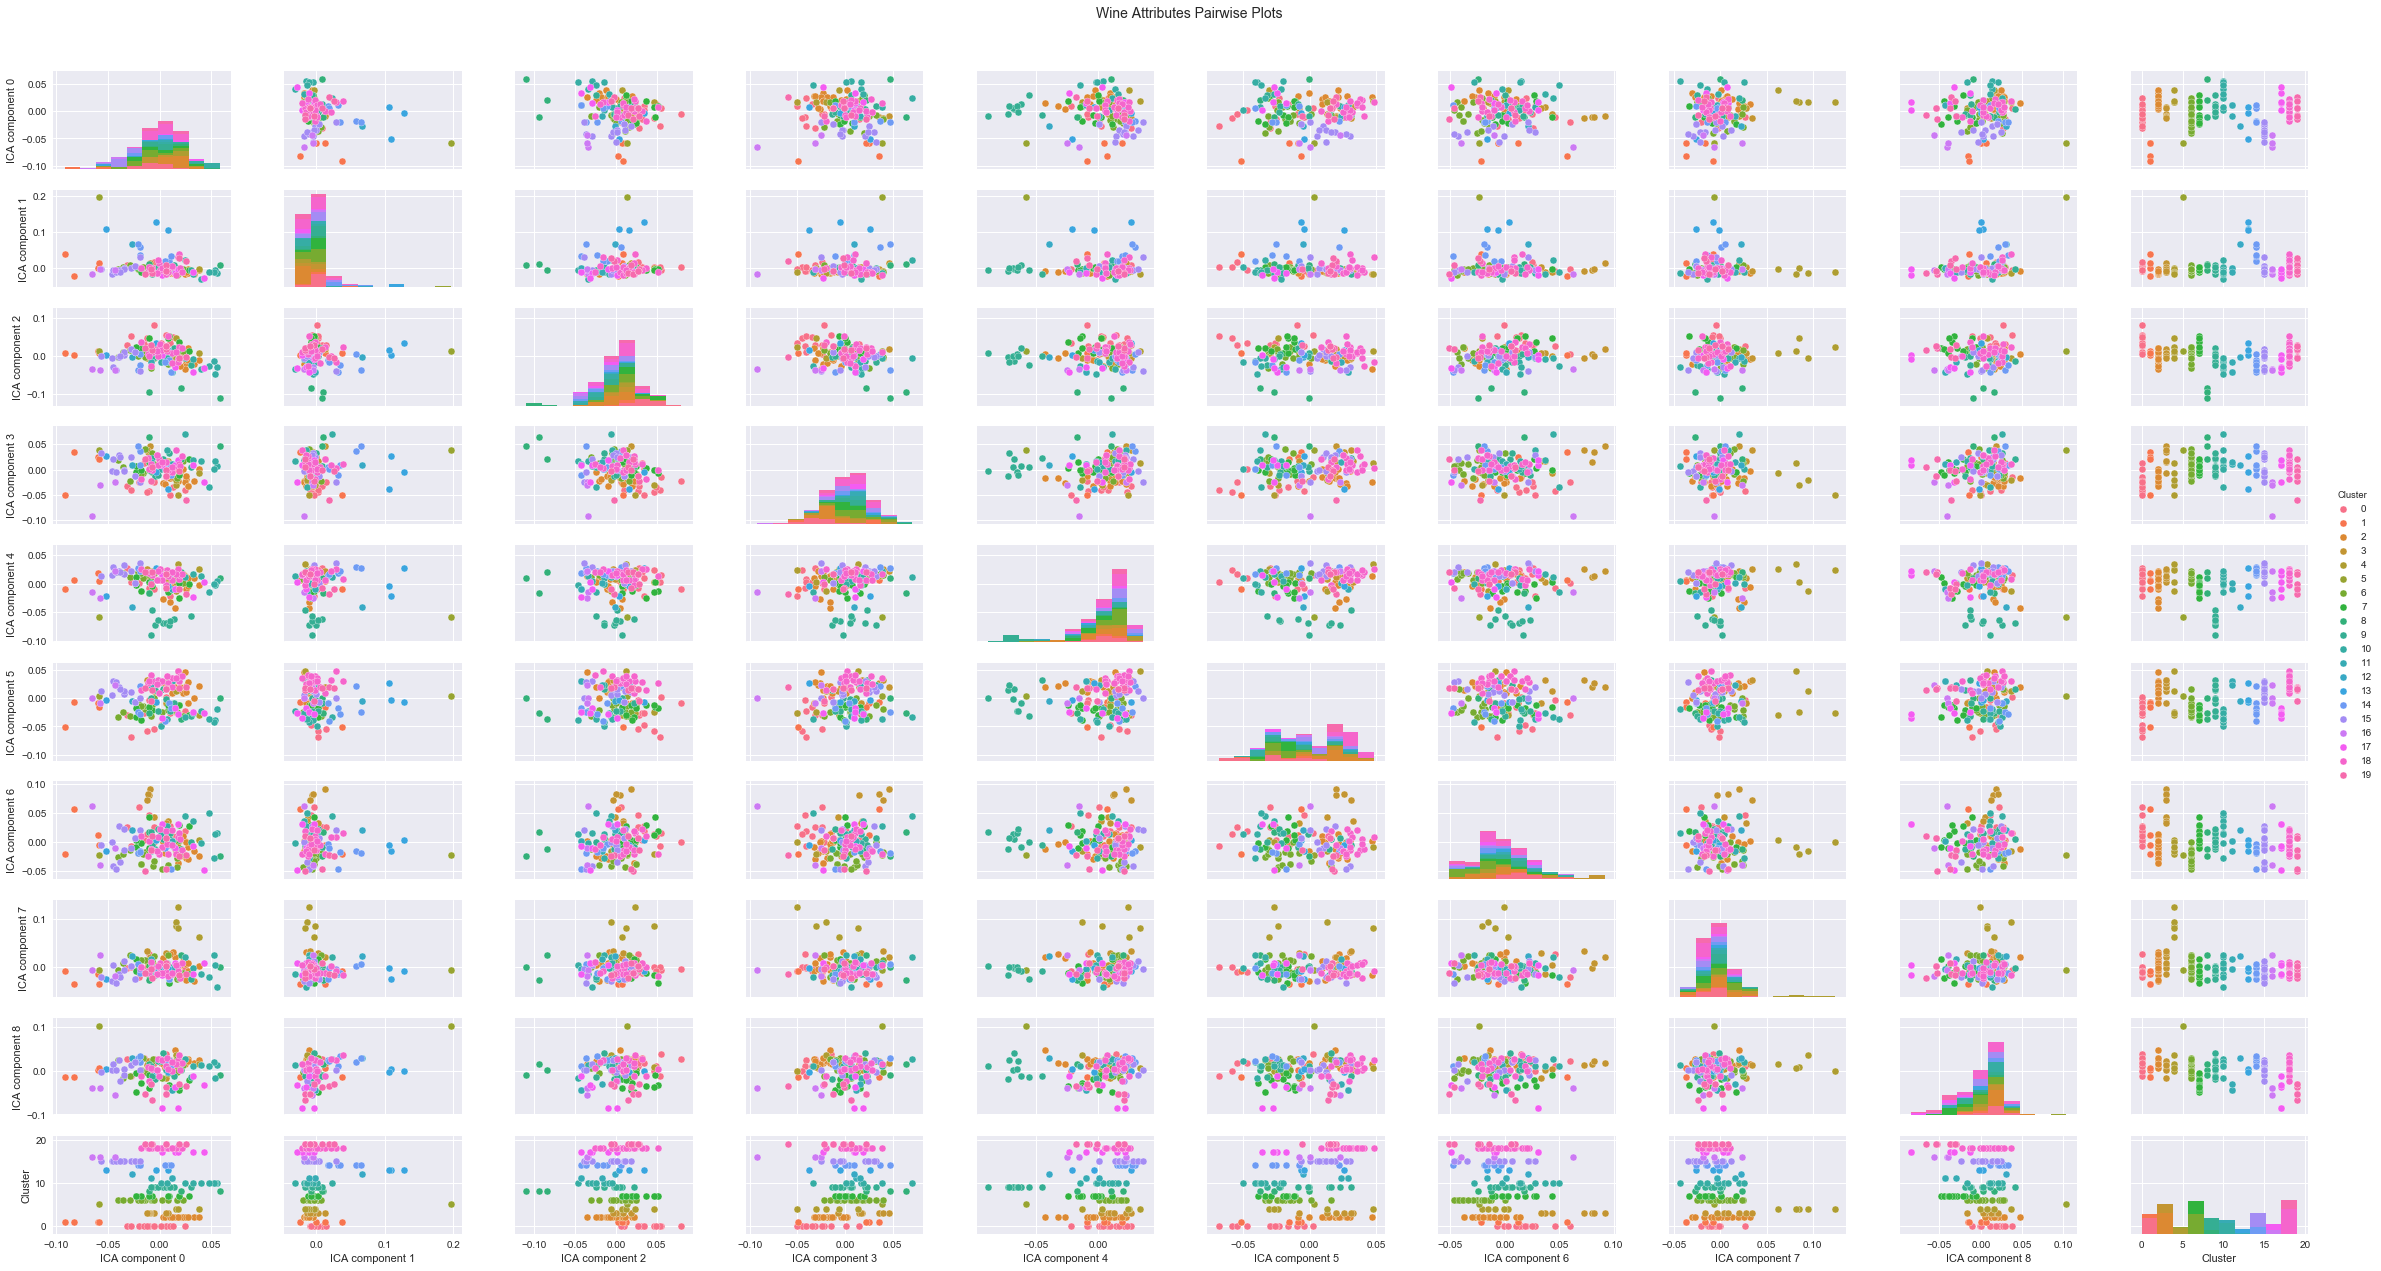

In [23]:
icaDf['Cluster'] =y_kmeans
pp = sns.pairplot(icaDf, hue='Cluster', size=1.8, aspect=1.8)
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)